##根据模型分析feature

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
import cPickle
import matplotlib.pyplot as plt
%matplotlib inline
import patsy

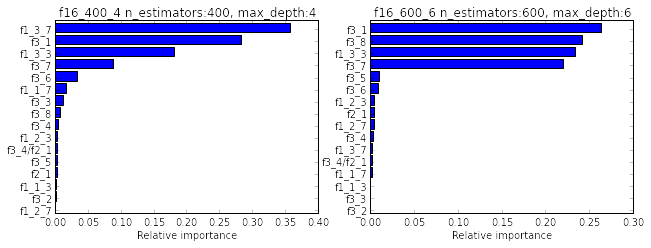

In [2]:
fig = plt.figure(figsize=(16,20), dpi=1600)

with open('models/f16_gbrt 1212[n_estimators=400,max_depth=4, min_samples_leaf=2].pickle','r') as f:
    f16_400_4 = cPickle.load(f)

with open('models/f16_gbrt 1212[n_estimators=600,max_depth=6, min_samples_leaf=2].pickle','r') as f:
    f16_600_6 = cPickle.load(f)

def plot_feature_importances(model, mname, loc):
    plt.subplot2grid((5,3), loc)
    names = ['f3_%d'%j for j in range(1,9)] + ['f2_1','f3_4/f2_1'] + \
                ['f1_1_3','f1_1_7','f1_2_3','f1_2_7','f1_3_3','f1_3_7']
    # sort importances
    indices = np.argsort(model.feature_importances_)
    # plot as bar chart
    plt.barh(np.arange(len(names)), model.feature_importances_[indices])
    plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
    _ = plt.xlabel('Relative importance')
    params = model.get_params()
    plt.title("%s n_estimators:%d, max_depth:%d"%(mname, params['n_estimators'], params['max_depth']))

plot_feature_importances(f16_400_4, 'f16_400_4', (0,1))
plot_feature_importances(f16_600_6, 'f16_600_6', (0,2))

In [3]:
f16_400_4.train_score_

array([  3.42339692e-002,   4.56440398e+004,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+230,   1.07950235e+230,
         1.07950235e+230,   1.07950235e+

In [2]:
def plot_feature_importances(model):
    names = ['f3_%d'%i for i in range(1,9)]
    # sort importances
    indices = np.argsort(model.feature_importances_)
    # plot as bar chart
    plt.barh(np.arange(len(names)), model.feature_importances_[indices])
    plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
    _ = plt.xlabel('Relative importance')

In [3]:
# f = open('models/gbrt 1212[n_estimators=300].pickle','r')
# gbrt_1212_300 = cPickle.load(f)
# f.close()
# f = open('models/gbrt 1212[n_estimators=400, max_depth=4, min_samples_leaf=2].pickle','r')
# gbrt_1212_400 = cPickle.load(f)
# f.close()
# f = open('models/gbrt 1212[n_estimators=500, max_depth=4, min_samples_leaf=2].pickle','r')
# gbrt_1212_500 = cPickle.load(f)
# f.close()
# f = open('models/gbrt~1212[n_estimators=300].pickle','r')
# gbrt_300 = cPickle.load(f)
# f.close()
# f = open('models/gbrt~1212[n_estimators=400, max_depth=4, min_samples_leaf=2].pickle','r')
# gbrt_400 = cPickle.load(f)
# f.close()
# f = open('models/gbrt~1212[n_estimators=500,max_depth=4, min_samples_leaf=2].pickle', 'r')
# gbrt_500 = cPickle.load(f)
# f.close()
# f = open('models/f10_gbrt 1212[n_estimators=500,max_depth=4, min_samples_leaf=2].pickle','r')
# gbrt_1212_f10_500 = cPickle.load(f)
# f.close()
# f = open('models/f10_gbrt 1212[n_estimators=600,max_depth=4, min_samples_leaf=2].pickle','r')
# gbrt_1212_f10_600 = cPickle.load(f)
# f.close()
# f = open('models/f10_gbrt 1212[n_estimators=600,max_depth=5, min_samples_leaf=2].pickle','r')
# gbrt_1212_f10_600_5 = cPickle.load(f)
# f.close()
# f = open('models/f10_gbrt~1212[n_estimators=600,max_depth=5, min_samples_leaf=2].pickle','r')
# gbrt_f10_600_5 = cPickle.load(f)
# f.close()
# f = open('models/f10_gbrt 1212[n_estimators=600,max_depth=6, min_samples_leaf=2].pickle','r')
# gbrt_1212_f10_600_6 = cPickle.load(f)
# f.close()
# f = open('models/f10_gbrt~1212[n_estimators=600,max_depth=6, min_samples_leaf=2].pickle','r')
# gbrt_f10_600_6 = cPickle.load(f)
# f.close()
# # f11
# f = open('models/f11_gbrt~1212[n_estimators=600,max_depth=6, min_samples_leaf=2].pickle','r')
# gbrt_f11_600_6 = cPickle.load(f)
# f.close()
# f = open('models/f11_gbrt~1212[n_estimators=500,max_depth=4, min_samples_leaf=2].pickle','r')
# gbrt_f11_500_4 = cPickle.load(f)
# f.close()
# f = open('models/f11_gbrt 1212[n_estimators=500,max_depth=4, min_samples_leaf=2].pickle','r')
# gbrt_1212_f11_500_4 = cPickle.load(f)
# f.close()

# models = [gbrt_1212_300, gbrt_1212_400, gbrt_1212_500, gbrt_300, gbrt_400, gbrt_500]
# modelname = ['gbrt_1212_300', 'gbrt_1212_400', 'gbrt_1212_500', 'gbrt_300', 'gbrt_400', 'gbrt_500']
# fig = plt.figure(figsize=(16,20), dpi=1600)

# for i in range(len(models)):
#     plt.subplot2grid((5,3), (i/3, i%3))
#     model = models[i]
#     names = ['f3_%d'%j for j in range(1,9)]
#     # sort importances
#     indices = np.argsort(model.feature_importances_)
#     # plot as bar chart
#     plt.barh(np.arange(len(names)), model.feature_importances_[indices])
#     plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
#     _ = plt.xlabel('Relative importance')
#     params = model.get_params()
#     plt.title("%s n_estimators:%d, max_depth:%d"%(modelname[i], params['n_estimators'], params['max_depth']))

# def plot_feature_importances(model, modelname, loc, xlabel='Relative importance'):
#     plt.subplot2grid((5,3), loc)
#     names = ['f3_%d'%i for i in range(1,9)]
#     names.append('f2_1')
#     names.append('f3_4/f2_1')
#     if modelname.startswith('f11'):
#         names.append('f2_1/f2_2')
#     # sort importances
#     indices = np.argsort(model.feature_importances_)
#     # plot as bar chart
#     plt.barh(np.arange(len(names)), model.feature_importances_[indices])
#     plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
#     _ = plt.xlabel(xlabel)
#     params = model.get_params()
#     plt.title("%s n_estimators:%d, max_depth:%d"%(modelname, params['n_estimators'], params['max_depth']))
    
# plot_feature_importances(gbrt_1212_f10_500, '1212_f10_500', (2,0), '6.51, hits 30')
# plot_feature_importances(gbrt_1212_f10_600, '1212_f10_600', (2,1))
# plot_feature_importances(gbrt_1212_f10_600_5, '1212_f10_600_5', (2,2))
# plot_feature_importances(gbrt_1212_f10_600_6, '1212_f10_600_6', (3,0), '7.0, hits 35')
# plot_feature_importances(gbrt_f10_600_5, 'f10_600_5', (3,1))
# plot_feature_importances(gbrt_f10_600_6, 'f10_600_6', (3,2))
# plot_feature_importances(gbrt_f11_600_6, 'f11_600_6', (4,0), '1.0, hits 5')
# plot_feature_importances(gbrt_1212_f11_500_4, 'f11_1212_500_4', (4,1))
# plot_feature_importances(gbrt_f11_500_4, 'f11_500_4', (4,2))


##用已训练好的模型来预测

In [ ]:
#predict_set

In [2]:
with open('models/f16_gbrt 1212[n_estimators=600,max_depth=6, min_samples_leaf=2].pickle','r') as f:
    est = cPickle.load(f)

# test_set = pd.read_csv('data/test_set/1212test_set.csv')
# #test_data = test_set.values
# test_set['buy'] = 0

# formula = 'buy ~ f3_1 + f3_2 + f3_3 + f3_4 + \
#                  f3_5 + f3_6 + f3_7 + f3_8 + \
#                  f1_1_3 + f1_1_7 + f1_2_3 + f1_2_7 + f1_3_3 + f1_3_7 + \
#                  f2_1 + np.true_divide(f3_4, f2_1+0.01)'# + np.true_divide(f2_1, f2_2)'
# # 用patsy的dmatrices生成一个对 友好的dataframe
# y, x = patsy.dmatrices(formula, data=test_set, return_type='dataframe')

# x = x.values[:, 1:]
# y = y.values[:, 0]

# #output = est.predict(test_data[0:, 2:])
# #output_prob = est.predict_proba(x)
# output_log_prob = est.predict_log_proba(x)

# # test_set = pd.read_csv('data/test_set/1212test_set.csv')
# # test_data = test_set.values

# # output_prob = model.predict_proba(test_data[0:, 2:])

# predict_set = pd.read_csv("data/test_set/1212ui_set.csv")

# print 'predicting ...'
# predict_set['buy'] = output_log_prob[:,1]
# print 'predict done'

# predict_set.to_csv("data/output/gbrt/f16_predict_set 1212 600 6 log.csv", index=False)

In [3]:
est

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)